결정트리_타이타닉 생존 예측 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
import graphviz

In [20]:
df = pd.read_csv('titanic.csv')
df.shape

(887, 8)

In [21]:
df.Name.unique()

array(['Mr. Owen Harris Braund',
       'Mrs. John Bradley (Florence Briggs Thayer) Cumings',
       'Miss. Laina Heikkinen',
       'Mrs. Jacques Heath (Lily May Peel) Futrelle',
       'Mr. William Henry Allen', 'Mr. James Moran',
       'Mr. Timothy J McCarthy', 'Master. Gosta Leonard Palsson',
       'Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson',
       'Mrs. Nicholas (Adele Achem) Nasser',
       'Miss. Marguerite Rut Sandstrom', 'Miss. Elizabeth Bonnell',
       'Mr. William Henry Saundercock', 'Mr. Anders Johan Andersson',
       'Miss. Hulda Amanda Adolfina Vestrom',
       'Mrs. (Mary D Kingcome) Hewlett', 'Master. Eugene Rice',
       'Mr. Charles Eugene Williams',
       'Mrs. Julius (Emelia Maria Vandemoortele) Vander Planke',
       'Mrs. Fatima Masselmani', 'Mr. Joseph J Fynney',
       'Mr. Lawrence Beesley', 'Miss. Anna McGowan',
       'Mr. William Thompson Sloper', 'Miss. Torborg Danira Palsson',
       'Mrs. Carl Oscar (Selma Augusta Emilia Johansson) Asplund',


In [22]:
df = df.set_index('Name')

In [23]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [24]:
df.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'Siblings','Parents', 'Fare']

In [25]:
df.head()

,Survived,Pclass,Sex,Age,Siblings,Parents,Fare
Name,,,,,,,
Mr. Owen Harris Braund,0,3,male,22.0,1,0,7.2500
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,1,female,38.0,1,0,71.2833
Miss. Laina Heikkinen,1,3,female,26.0,0,0,7.9250
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1,female,35.0,1,0,53.1000
Mr. William Henry Allen,0,3,male,35.0,0,0,8.0500


In [26]:
df.Survived.mean() #38%가 살아남았다.

0.3855693348365276

(array([ 63.,  51., 242., 211., 142.,  88.,  49.,  28.,  11.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

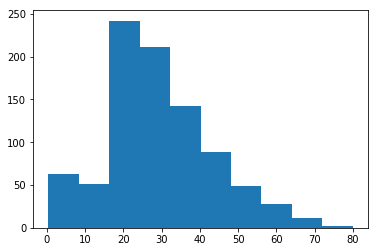

In [34]:
# 나이분포
plt.hist(df['Age'].values)

(array([216.,   0., 184.,   0., 487.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. ]),
 <a list of 5 Patch objects>)

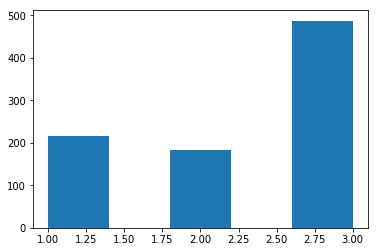

In [36]:
# 좌석분포
plt.hist(df['Pclass'].values, bins=5)

In [38]:
# 성별분포
s = df['Sex']
s.value_counts()

male      573
female    314
Name: Sex, dtype: int64

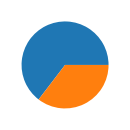

In [39]:
plt.figure(figsize=(5,2))
p = plt.pie(s.value_counts())

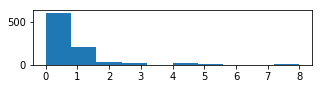

In [40]:
plt.figure(figsize=(5,1))
p = plt.hist(df['Siblings'].values)

(array([39., 20., 80., 78., 60., 34., 21.,  9.,  0.,  1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

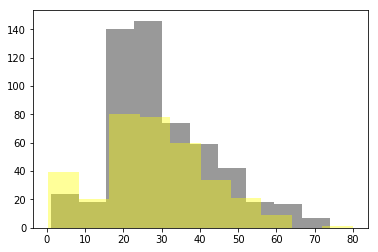

In [48]:
# 연령대별 생존
plt.hist(df[df['Survived']==0]['Age'].values, color='black', alpha=0.4)
plt.hist(df[df['Survived']==1]['Age'].values, color='yellow', alpha=0.4)

(array([ 81.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 233.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

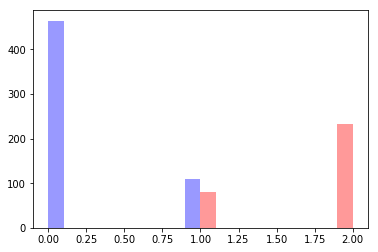

In [53]:
# 성별 생존
plt.hist(df[df['Sex']=='male']['Survived'].values, color='blue', alpha=0.4)
plt.hist(df[df['Sex']=='female']['Survived'].values+1, color='red', alpha=0.4)

In [54]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Siblings      int64
Parents       int64
Fare        float64
dtype: object

In [56]:
# Pclass는 범주이므로 object로 변경하기
df['Pclass'] = df['Pclass'].astype('object')

In [57]:
df.dtypes

Survived      int64
Pclass       object
Sex          object
Age         float64
Siblings      int64
Parents       int64
Fare        float64
dtype: object

In [58]:
# 범주는 objec로 연속은 int/float으로
data = pd.get_dummies(df)
data

,Survived,Age,Siblings,Parents,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
Name,,,,,,,,,,
Mr. Owen Harris Braund,0,22.0,1,0,7.2500,0,0,1,0,1
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,38.0,1,0,71.2833,1,0,0,1,0
Miss. Laina Heikkinen,1,26.0,0,0,7.9250,0,0,1,1,0
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000,1,0,0,1,0
Mr. William Henry Allen,0,35.0,0,0,8.0500,0,0,1,0,1
Mr. James Moran,0,27.0,0,0,8.4583,0,0,1,0,1
Mr. Timothy J McCarthy,0,54.0,0,0,51.8625,1,0,0,0,1
Master. Gosta Leonard Palsson,0,2.0,3,1,21.0750,0,0,1,0,1
Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,1,27.0,0,2,11.1333,0,0,1,1,0


In [60]:
X = data.drop(columns='Survived')
y = data['Survived']

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
model = DecisionTreeClassifier(max_depth=4).fit(X,y)

In [65]:
model.score(X, y)

0.8489289740698985

In [68]:
export_graphviz(model, out_file='titanic.dot', class_names=['Die','Live'], 
               feature_names=X.columns, impurity=False, filled=True)

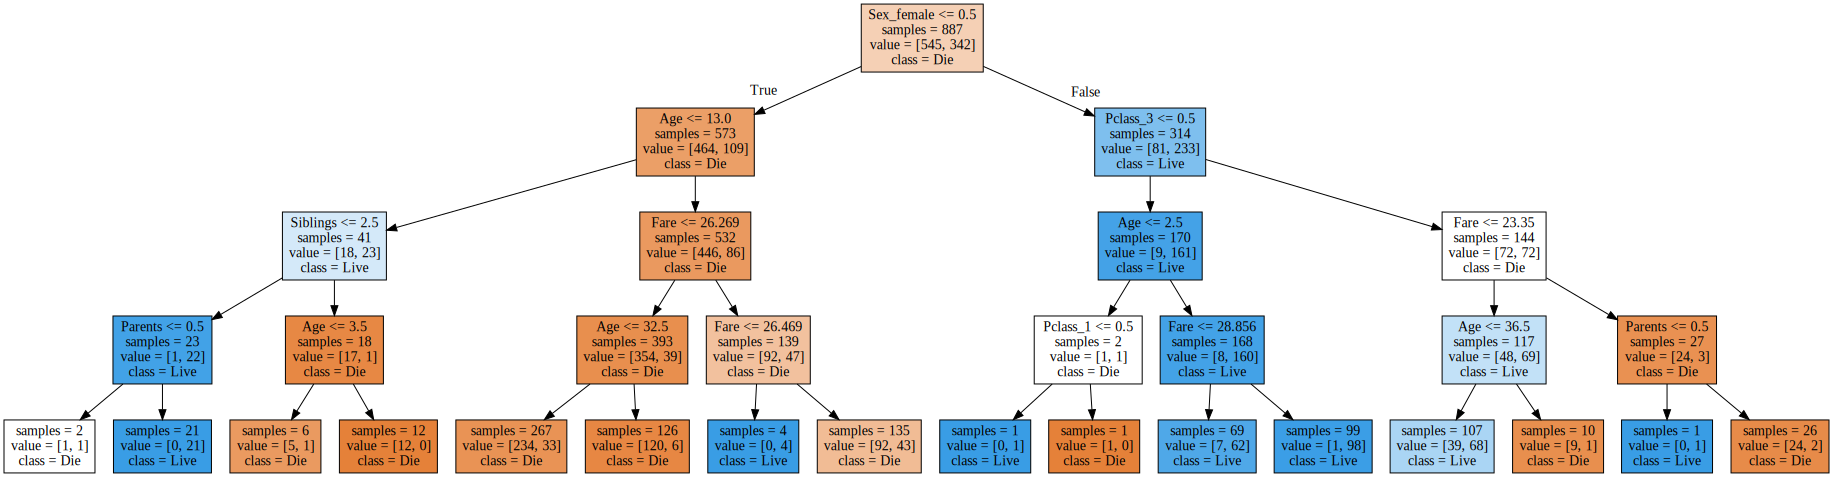

None

In [69]:
with open('titanic.dot') as f:
    titanic_graph = f.read()
g = display(graphviz.Source(titanic_graph))
display(g)

In [71]:
loans = pd.read_csv('loans.csv')
loans.shape

(9578, 14)

In [72]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


In [73]:
loans.isna().sum()

credit.policy         0
purpose               0
int.rate              0
installment           0
log.annual.inc        4
dti                   0
fico                  0
days.with.cr.line    29
revol.bal             0
revol.util           62
inq.last.6mths       29
delinq.2yrs          29
pub.rec              29
not.fully.paid        0
dtype: int64

In [74]:
loans = loans.dropna()
loans.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [75]:
loans.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths       float64
delinq.2yrs          float64
pub.rec              float64
not.fully.paid         int64
dtype: object

In [82]:
loans['not.fully.paid'].mean()

0.1598360655737705

In [78]:
loans.purpose.value_counts()

debt_consolidation    3949
all_other             2290
credit_card           1259
home_improvement       628
small_business         618
major_purchase         432
educational            340
Name: purpose, dtype: int64

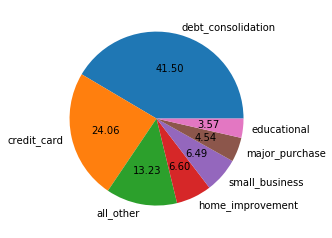

In [79]:
p = plt.pie(loans.purpose.value_counts(), labels=loans.purpose.unique(), autopct='%.2f')

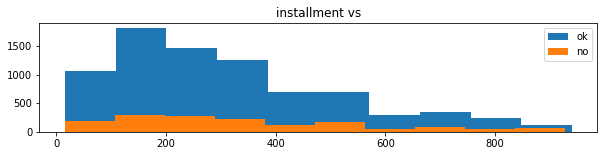

In [84]:
plt.figure(figsize=(10, 2))
p = plt.hist(loans['installment'][loans['not.fully.paid']==0], label='ok')
p = plt.hist(loans['installment'][loans['not.fully.paid']==1], label='no')
p = plt.title('installment vs')
p = plt.legend()

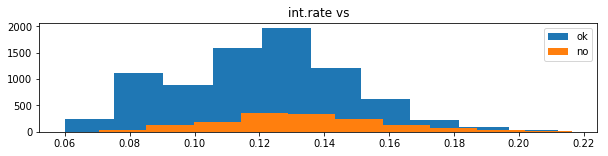

In [85]:
plt.figure(figsize=(10, 2))
p = plt.hist(loans['int.rate'][loans['not.fully.paid']==0], label='ok')
p = plt.hist(loans['int.rate'][loans['not.fully.paid']==1], label='no')
p = plt.title('int.rate vs')
p = plt.legend()

In [86]:
loans = pd.get_dummies(loans) #카테고리를 원핫 인코딩

In [87]:
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0,0,1,0,0,0,0,0


In [89]:
X = loans.drop(columns='not.fully.paid')
y = loans['not.fully.paid']

In [90]:
model = DecisionTreeClassifier(max_depth=5).fit(X,y)

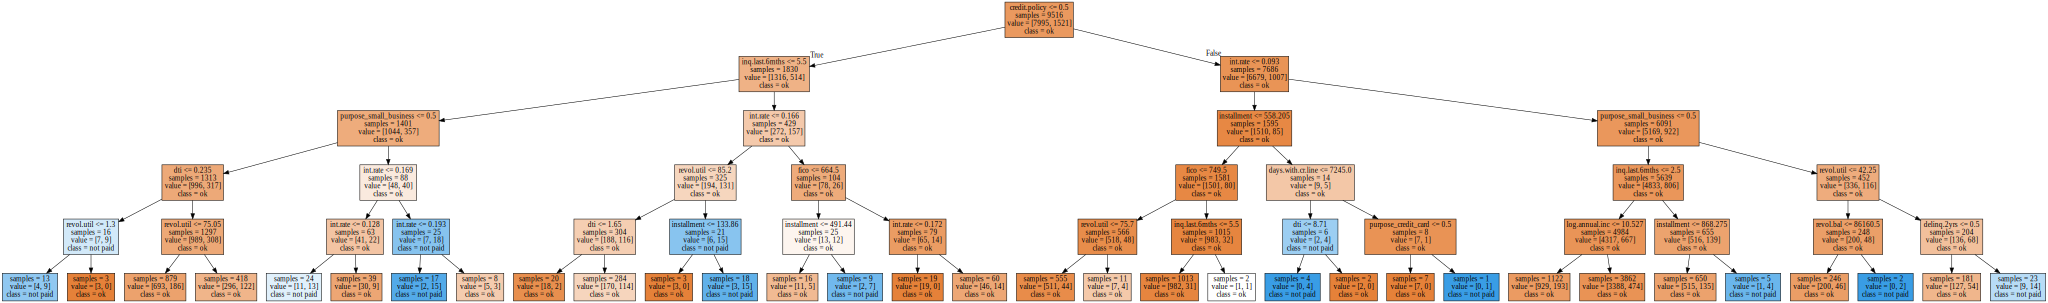

None

In [91]:
export_graphviz(model, out_file='loans.dot', class_names=['ok','not paid'], 
               feature_names=X.columns, impurity=False, filled=True)
with open('loans.dot') as f:
    loans_graph = f.read()
g = display(graphviz.Source(loans_graph))
display(g)